<a href="https://colab.research.google.com/github/juniorPalomino25/Python/blob/main/XOR_con_Neurolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install neurolab

     |████████████████████████████████| 645 kB 7.2 MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22180 sha256=dc613480a1a2407a58f5f6830365210a774fcdf2a194134f7d94e1f7e8e0e65e
  Stored in directory: /root/.cache/pip/wheels/3e/07/63/e3d6e066089d7186465184a6f9a1884471485f38beef1edeaa
Successfully built neurolab


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [3]:
data = np.loadtxt('DataXOR.txt')
print(data)

[[0. 0. 0.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [4]:
data.shape

(4, 3)

In [5]:
#Entrada
X = data[:,0:2]
print(X)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


In [6]:
#Salida
y = data[:,2:]
print(y)

[[0.]
 [1.]
 [1.]
 [0.]]


Text(0.5, 1.0, 'Datos de Entrada')

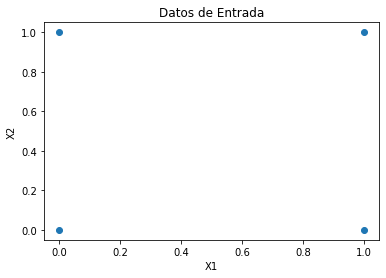

In [7]:
#Gráficos de data
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Datos de Entrada')

In [8]:
x1_min, x1_max = data[:,0].min(), data[:,0].max()

In [9]:
x2_min, x2_max = data[:,1].min(), data[:,1].max()

In [10]:
print(x1_min,x1_max,x2_min,x2_max)

0.0 1.0 0.0 1.0


In [11]:
num_salidas = y.shape[1]
print(num_salidas)

1


###Definir una red multicapa con 2 neuronas en la capa de entrada y 1 de salida. La capa oculta tiene 10 neuronas

In [12]:
x1 = [x1_min,x1_max]
x2 = [x2_min,x2_max]
multicapa = nl.net.newff([x1,x2],[10,1])

In [13]:
multicapa.trainf = nl.train.train_gd

###Entrenar la red multicapa usando la data

In [14]:
progreso_error = multicapa.train(X,y,epochs=1000,show=20,goal=0.01)

Epoch: 20; Error: 0.9016931600516509;
Epoch: 40; Error: 0.8127055622799113;
Epoch: 60; Error: 0.6037394991265801;
Epoch: 80; Error: 0.474553563422125;
Epoch: 100; Error: 0.3996436146804134;
Epoch: 120; Error: 0.2751132742880631;
Epoch: 140; Error: 0.1693473560780938;
Epoch: 160; Error: 0.12254939834022964;
Epoch: 180; Error: 0.09571817700022259;
Epoch: 200; Error: 0.07803597130994509;
Epoch: 220; Error: 0.0654149367132811;
Epoch: 240; Error: 0.05593964079505516;
Epoch: 260; Error: 0.04858298193566586;
Epoch: 280; Error: 0.04273071391339871;
Epoch: 300; Error: 0.037985748731235294;
Epoch: 320; Error: 0.034077521352977876;
Epoch: 340; Error: 0.03081481419131216;
Epoch: 360; Error: 0.028058769903416596;
Epoch: 380; Error: 0.025706357086298193;
Epoch: 400; Error: 0.02367973626040585;
Epoch: 420; Error: 0.021919174522241403;
Epoch: 440; Error: 0.02037819487040027;
Epoch: 460; Error: 0.019020181720346915;
Epoch: 480; Error: 0.01781596096154322;
Epoch: 500; Error: 0.016742046588409974;
Epoch:

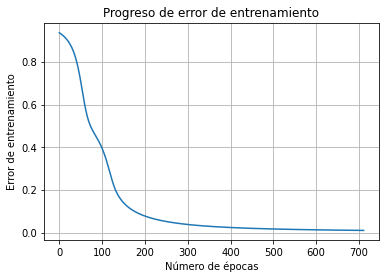

In [15]:
plt.figure()
plt.plot(progreso_error)
plt.xlabel('Número de épocas')
plt.ylabel('Error de entrenamiento')
plt.title('Progreso de error de entrenamiento')
plt.grid()

In [17]:
print('\nResultados de Prueba:')
datos_prueba = [[1,0],[0,1],[0,0],[1,1]]
for item in datos_prueba:
  print(item, '==', np.round(multicapa.sim([item]),0))


Resultados de Prueba:
[1, 0] == [[1.]]
[0, 1] == [[1.]]
[0, 0] == [[0.]]
[1, 1] == [[0.]]


In [18]:
# Save network in file
multicapa.save('xor_multicapa.net')
# Load network
# net = nl.load('test.net')